### Getting Singapore Population Data from Singstats
In this notebook, we will be using The Singapore Department of Statistics's (DOS) API to get the latest data on Singapore's population. 

#### Load libraries

In [1]:
# Send HTTP requests
import requests

# Wrangling libraries
import json
import pandas as pd
from functools import reduce

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#### Get Data with API

In [1]:
# Since the website blocks requests from non browsers, the following code will emulate a browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

In [3]:
# API url
url = 'https://tablebuilder.singstat.gov.sg/api/table/tabledata/M810001?isTestApi=true'

# Store reply in response variable
response = requests.get(url, headers=headers)

In [5]:
# View response type
type(response)

requests.models.Response

In [6]:
# Convert response to json and view
json_object = response.json()
json_object

{'Data': {'id': 'M810001',
  'title': 'Indicators On Population, Annual',
  'footnote': "For more information, please refer to the 'Population Trends' publication (www.singstat.gov.sg/publications/population/population-trends) and the Information Paper on 'Singapore Resident Population, 2003-2007' (www.singstat.gov.sg/-/media/files/publications/population/respop.pdf).  For more information on Rate of Natural Increase, please refer to the Statistics Singapore Newsletter on 'Singapore's Rate of Natural Increase for Population' (www.singstat.gov.sg/find-data/search-by theme/population/population-and-population-structure/publications-and-methodology). For more information on Old-Age Support Ratio, please refer to the the Infographics on 'Old-Age Support Ratio' (www.singstat.gov.sg/modules/infographics/old-age-support-ratio) and Statistics Singapore Newsletter on 'Are the Old-Age Support Ratio Trends Similar Across Different Working-Age Groups' (www.singstat.gov.sg/find-data/search-by-theme

#### Extract Required Data from API Response
The API response provided us with more data than required. The next steps will be extracting the required data. Since the DOS website was not helpful with how to get the data from the API response, we will explore the json file and sequentially extract it. 

In [8]:
# View keys in the dictionary.
json_object.keys()


dict_keys(['Data', 'DataCount', 'StatusCode', 'Message'])

In [10]:
# See how data is stored in the key named data
json_object['Data']


{'id': 'M810001',
 'title': 'Indicators On Population, Annual',
 'footnote': "For more information, please refer to the 'Population Trends' publication (www.singstat.gov.sg/publications/population/population-trends) and the Information Paper on 'Singapore Resident Population, 2003-2007' (www.singstat.gov.sg/-/media/files/publications/population/respop.pdf).  For more information on Rate of Natural Increase, please refer to the Statistics Singapore Newsletter on 'Singapore's Rate of Natural Increase for Population' (www.singstat.gov.sg/find-data/search-by theme/population/population-and-population-structure/publications-and-methodology). For more information on Old-Age Support Ratio, please refer to the the Infographics on 'Old-Age Support Ratio' (www.singstat.gov.sg/modules/infographics/old-age-support-ratio) and Statistics Singapore Newsletter on 'Are the Old-Age Support Ratio Trends Similar Across Different Working-Age Groups' (www.singstat.gov.sg/find-data/search-by-theme/population

In [11]:
# Data seems to be stored in the key called row - json_object['Data']['row']
# Use type function to view how data is stored
type(json_object['Data']['row'])


list

In [13]:
# View structure of first item in list
json_object['Data']['row'][0]


{'seriesNo': '1',
 'rowText': 'Total Population',
 'uoM': 'Number',
 'footnote': "Total population comprises S'pore residents & non-residents.  Resident population comprises S'pore citizens & permanent residents.  Data prior to 1990 are based on de facto concept (i.e. the person is present in the country at the reference period), while data from 1990 onwards are based on de jure concept (i.e. the person's place of usual residence).  Data from 2003 onwards exclude residents who are overseas for a continuous period of 12 months or longer as at the reference period.",
 'columns': [{'key': '1950', 'value': '1022100'},
  {'key': '1951', 'value': '1068100'},
  {'key': '1952', 'value': '1127000'},
  {'key': '1953', 'value': '1191800'},
  {'key': '1954', 'value': '1248200'},
  {'key': '1955', 'value': '1305500'},
  {'key': '1956', 'value': '1371600'},
  {'key': '1957', 'value': '1445929'},
  {'key': '1958', 'value': '1518800'},
  {'key': '1959', 'value': '1587200'},
  {'key': '1960', 'value': 

In [18]:
# Since the first item in the series only shows data from total population,
# lets, extract entire dictionary into a data frame since we are better at
# working with data frames
df = pd.DataFrame.from_records(json_object['Data']['row'])

# View DF
df.head(20)

,seriesNo,rowText,uoM,footnote,columns
0,1,Total Population,Number,Total population comprises S'pore residents & ...,"[{'key': '1950', 'value': '1022100'}, {'key': ..."
1,2,Resident Population,Number,Data are as at end-June. Data prior to 1990 a...,"[{'key': '1970', 'value': '2013563'}, {'key': ..."
2,3,Singapore Citizen Population,Number,Data are as at end-June. Data prior to 1990 a...,"[{'key': '1970', 'value': '1874778'}, {'key': ..."
3,4,Permanent Resident Population,Number,Data are as at end-June. Data prior to 1990 a...,"[{'key': '1970', 'value': '138785'}, {'key': '..."
4,5,Non-Resident Population,Number,Data are as at end-June. Non-resident populat...,"[{'key': '1970', 'value': '60944'}, {'key': '1..."
5,6,Total Population Growth,Per Cent,"For Census years of 1970, 1980 and 1990, data ...","[{'key': '1950', 'value': '4.4'}, {'key': '195..."
6,7,Resident Population Growth,Per Cent,"For Census years of 1980 and 1990, data refer ...","[{'key': '1980', 'value': '1.3'}, {'key': '198..."
7,8,Population Density,Total Population Per Square Kilometre,"Prior to 2003, data are based on Singapore's l...","[{'key': '1957', 'value': '2486'}, {'key': '19..."
8,9,Sex Ratio,Males Per Thousand Females,Data prior to 1980 (except 1970) pertain to to...,"[{'key': '1950', 'value': '1173'}, {'key': '19..."
9,10,Median Age Of Resident Population,Years,Data prior to 1980 (except 1970) pertain to to...,"[{'key': '1957', 'value': '18.8'}, {'key': '19..."


In [19]:
# From this DF, we would like to extract only certain columns:
# 'Total Population', 'Resident Population', 'Singapore Citizen Population', 'Non-Resident Population'
# To make the wrangling easier, lets replace certain characters in the rowText column
df['rowText'] = df['rowText'].str.replace(" ", "")
df['rowText'] = df['rowText'].str.replace("-", "_")
df['rowText'] = df['rowText'].str.replace(":", "_")


In [21]:
# Make list of types of data
names_col = df['rowText'].tolist()
names_col

['TotalPopulation',
 'ResidentPopulation',
 'SingaporeCitizenPopulation',
 'PermanentResidentPopulation',
 'Non_ResidentPopulation',
 'TotalPopulationGrowth',
 'ResidentPopulationGrowth',
 'PopulationDensity',
 'SexRatio',
 'MedianAgeOfResidentPopulation',
 'MedianAgeOfCitizenPopulation',
 'Old_AgeSupportRatio_ResidentsAged15_64YearsPerResidentAged65Years&Over',
 'AgeDependencyRatio_ResidentsAgedUnder15YearsAnd65YearsPerHundredResidentsAged15_64Years',
 'ChildDependencyRatio_ResidentsAgedUnder15YearsPerHundredResidentsAged15_64Years',
 'Old_AgeDependencyRatio_ResidentsAged65Years&OverPerHundredResidentsAged15_64Years',
 'Old_AgeSupportRatio_ResidentsAged20_64YearsPerResidentAged65Years&Over',
 'AgeDependencyRatio_ResidentsAgedUnder20YearsAnd65Years&OverPerHundredResidentsAged20_64Years',
 'ChildDependencyRatio_ResidentsAgedUnder20YearsPerHundredResidentsAged20_64Years',
 'Old_AgeDependencyRatio_ResidentsAged65Years&OverPerHundredResidentsAged20_64Years',
 'Old_AgeSupportRatio_CitizensA

In [22]:
# Data we're interested in:
df[['rowText', 'columns']]


,rowText,columns
0,TotalPopulation,"[{'key': '1950', 'value': '1022100'}, {'key': ..."
1,ResidentPopulation,"[{'key': '1970', 'value': '2013563'}, {'key': ..."
2,SingaporeCitizenPopulation,"[{'key': '1970', 'value': '1874778'}, {'key': ..."
3,PermanentResidentPopulation,"[{'key': '1970', 'value': '138785'}, {'key': '..."
4,Non_ResidentPopulation,"[{'key': '1970', 'value': '60944'}, {'key': '1..."
5,TotalPopulationGrowth,"[{'key': '1950', 'value': '4.4'}, {'key': '195..."
6,ResidentPopulationGrowth,"[{'key': '1980', 'value': '1.3'}, {'key': '198..."
7,PopulationDensity,"[{'key': '1957', 'value': '2486'}, {'key': '19..."
8,SexRatio,"[{'key': '1950', 'value': '1173'}, {'key': '19..."
9,MedianAgeOfResidentPopulation,"[{'key': '1957', 'value': '18.8'}, {'key': '19..."


In [23]:
# Columns to extract
extract = ['TotalPopulation', 'ResidentPopulation', 'SingaporeCitizenPopulation', 'Non_ResidentPopulation']

# For loop through names_col
for x in names_col:
    # Second for loop to get data in extract list
    for index, row in df[df['rowText'].isin(extract)].iterrows():
        if x == row['rowText']:
            # Create a global variable with a name based on columns listed in
            # extract using from_records which creates a DataFrame object
            # from a structured ndarray, sequence of tuples or dicts, or DataFrame.
            globals()['%s' % x] = pd.DataFrame.from_records(row['columns'])


In [24]:
# Rename Columns
TotalPopulation = TotalPopulation.rename(columns={"value": "TotalPopulation"})
ResidentPopulation = ResidentPopulation.rename(columns={"value": "ResidentPopulation"})
SingaporeCitizenPopulation = SingaporeCitizenPopulation.rename(columns={"value": "SingaporeCitizenPopulation"})
Non_ResidentPopulation = Non_ResidentPopulation.rename(columns={"value": "Non_ResidentPopulation"})


In [26]:
# Joining all dfs into one
df_pop = reduce(lambda left, right:
                     pd.merge(left , right,
                              on = ["key"]),
                              [TotalPopulation, ResidentPopulation, SingaporeCitizenPopulation, Non_ResidentPopulation])

#View
df_pop


,key,TotalPopulation,ResidentPopulation,SingaporeCitizenPopulation,Non_ResidentPopulation
0,1970,2074507,2013563,1874778,60944
1,1980,2413945,2282125,2194280,131820
2,1990,3047132,2735868,2623736,311264
3,1991,3135083,2794704,2664625,340379
4,1992,3230698,2849754,2702430,380944
5,1993,3313471,2904547,2742826,408924
6,1994,3419048,2959350,2784168,459698
7,1995,3524506,3013515,2823707,510991
8,1996,3670704,3068132,2860419,602572
9,1997,3796038,3123403,2894794,672635


In [27]:
# View column types
df_pop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   key                         36 non-null     object
 1   TotalPopulation             36 non-null     object
 2   ResidentPopulation          36 non-null     object
 3   SingaporeCitizenPopulation  36 non-null     object
 4   Non_ResidentPopulation      36 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [28]:
# Change column type into int
df_pop['TotalPopulation'] = df_pop['TotalPopulation'].astype('int')
df_pop['ResidentPopulation'] = df_pop['ResidentPopulation'].astype('int')
df_pop['SingaporeCitizenPopulation'] = df_pop['SingaporeCitizenPopulation'].astype('int')
df_pop['Non_ResidentPopulation'] = df_pop['Non_ResidentPopulation'].astype('int')


In [29]:
# Check if the numbers add up
df_pop[df_pop['TotalPopulation'] != df_pop['ResidentPopulation'] + df_pop['Non_ResidentPopulation']]


,key,TotalPopulation,ResidentPopulation,SingaporeCitizenPopulation,Non_ResidentPopulation


In [30]:
# Derive permanent resident numbers
df_pop['SingaporePermanentResident'] = df_pop['ResidentPopulation'] - df_pop['SingaporeCitizenPopulation']
df_pop

,key,TotalPopulation,ResidentPopulation,SingaporeCitizenPopulation,Non_ResidentPopulation,SingaporePermanentResident
0,1970,2074507,2013563,1874778,60944,138785
1,1980,2413945,2282125,2194280,131820,87845
2,1990,3047132,2735868,2623736,311264,112132
3,1991,3135083,2794704,2664625,340379,130079
4,1992,3230698,2849754,2702430,380944,147324
5,1993,3313471,2904547,2742826,408924,161721
6,1994,3419048,2959350,2784168,459698,175182
7,1995,3524506,3013515,2823707,510991,189808
8,1996,3670704,3068132,2860419,602572,207713
9,1997,3796038,3123403,2894794,672635,228609


#### Deriving Growth Rate for Each Year

In [33]:
# Derive percentage change with built in pct_change function
df_pop['ResidentPopulation_Growth_Rate'] = df_pop['ResidentPopulation'].pct_change(periods=1) * 100
df_pop['Non_ResidentPopulation_Growth_Rate'] = df_pop['Non_ResidentPopulation'].pct_change(periods=1) * 100
df_pop['SingaporeCitizen_Growth_Rate'] = df_pop['SingaporeCitizenPopulation'].pct_change(periods=1) * 100
df_pop['SingaporePR_Growth_Rate'] = df_pop['SingaporePermanentResident'].pct_change(periods=1) * 100
df_pop


,key,TotalPopulation,ResidentPopulation,SingaporeCitizenPopulation,Non_ResidentPopulation,SingaporePermanentResident,Non_ResidentPopulation_Growth_Rate,SingaporeCitizen_Growth_Rate,SingaporePR_Growth_Rate,ResidentPopulation_Growth_Rate
0,1970,2074507,2013563,1874778,60944,138785,NaN,NaN,NaN,NaN
1,1980,2413945,2282125,2194280,131820,87845,116.296928,17.042124,-36.704255,13.337651
2,1990,3047132,2735868,2623736,311264,112132,136.128053,19.571613,27.647561,19.882478
3,1991,3135083,2794704,2664625,340379,130079,9.353796,1.558427,16.005244,2.150542
4,1992,3230698,2849754,2702430,380944,147324,11.917598,1.418774,13.257328,1.969797
5,1993,3313471,2904547,2742826,408924,161721,7.344912,1.494803,9.772339,1.922727
6,1994,3419048,2959350,2784168,459698,175182,12.416488,1.507278,8.323594,1.886800
7,1995,3524506,3013515,2823707,510991,189808,11.157978,1.420137,8.349031,1.830301
8,1996,3670704,3068132,2860419,602572,207713,17.922233,1.300135,9.433217,1.812402
9,1997,3796038,3123403,2894794,672635,228609,11.627324,1.201747,10.060035,1.801454


#### Saving DF into a TSV file

In [37]:
df_pop.to_csv('../data/processed/singapore_population_data_1990_2023.csv', sep='\t')


#### Visualising Data

In [39]:
# reshape the data using melt for Seaborn's lineplot
melted_df = df_pop.melt(id_vars=['key'], value_vars=['TotalPopulation', 'ResidentPopulation'],
                    var_name='Population Type', value_name='Population Count')

melted_df

,key,Population Type,Population Count
0,1970,TotalPopulation,2074507
1,1980,TotalPopulation,2413945
2,1990,TotalPopulation,3047132
3,1991,TotalPopulation,3135083
4,1992,TotalPopulation,3230698
...,...,...,...
67,2019,ResidentPopulation,4026209
68,2020,ResidentPopulation,4044210
69,2021,ResidentPopulation,3986842
70,2022,ResidentPopulation,4073239


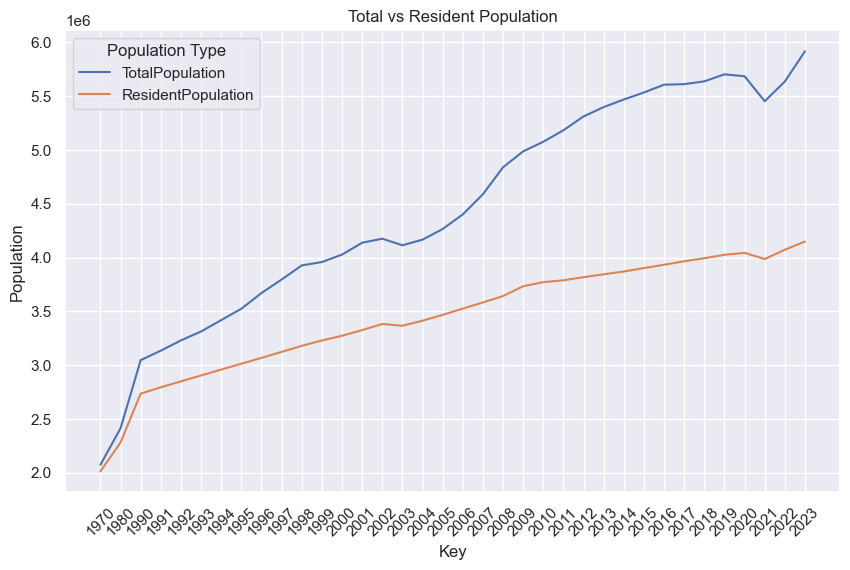

In [51]:
# Set style
sns.set(style="darkgrid")

# Create the line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='key', y='Population Count', hue='Population Type', data=melted_df)
ax.set_title('Total vs Resident Population')
ax.set_xlabel('Key')
ax.set_ylabel('Population')
plt.xticks(rotation=45)
# ax.set_ylim(bottom=0)

plt.show()

**Comments on Graph** 
- The starting of the graph is steep cause it begins with a single data point for the 1970s & 1980s. 
- 1990 onwards, the data is shown annually. 
- Unsure of what caused the dip in 2002-2003 but the dip from 2020-2021 was caused by COVID-19.